In [1]:
import pandas as pd
import os

# Path to your folder containing CSV files
folder_path = 'data'

# List to store individual DataFrames
dataframes = []

# Loop through each file in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):
        file_path = os.path.join(folder_path, file)
        # Read each CSV file into a DataFrame and append it to the list
        df = pd.read_csv(file_path, skiprows=2)
        dataframes.append(df)

# Concatenate all the DataFrames into one
data = pd.concat(dataframes, ignore_index=True)

# Display or manipulate final_dataframe
print(data)


C:\Users\tatak\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


        Year  Month  Day  Hour  Minute  Temperature  Clearsky DHI  \
0       1998      1    1     0       0         -4.0             0   
1       1998      1    1     0      30         -4.2             0   
2       1998      1    1     1       0         -4.5             0   
3       1998      1    1     1      30         -4.7             0   
4       1998      1    1     2       0         -4.9             0   
...      ...    ...  ...   ...     ...          ...           ...   
437995  2022     12   31    21      30          8.0            22   
437996  2022     12   31    22       0          8.2             0   
437997  2022     12   31    22      30          8.6             0   
437998  2022     12   31    23       0          8.9             0   
437999  2022     12   31    23      30          8.9             0   

        Clearsky DNI  Clearsky GHI  Cloud Type  ...  GHI  Relative Humidity  \
0                  0             0           0  ...    0              75.09   
1            

In [2]:
data.head(5)

,Year,Month,Day,Hour,Minute,Temperature,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,...,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Global Horizontal UV Irradiance (280-400nm),Global Horizontal UV Irradiance (295-385nm)
0,1998,1,1,0,0,-4.0,0,0,0,0,...,0,75.09,113.75,0.8,1021,0.4,305,3.8,0.0,0.0
1,1998,1,1,0,30,-4.2,0,0,0,0,...,0,76.30,119.47,0.8,1022,0.4,307,3.9,0.0,0.0
2,1998,1,1,1,0,-4.5,0,0,0,1,...,0,74.66,125.26,0.8,1022,0.4,308,4.0,0.0,0.0
3,1998,1,1,1,30,-4.7,0,0,0,1,...,0,75.87,131.06,0.8,1023,0.4,308,4.1,0.0,0.0
4,1998,1,1,2,0,-4.9,0,0,0,1,...,0,73.55,136.83,0.8,1024,0.4,309,4.1,0.0,0.0


In [3]:
data.shape

(438000, 24)

In [4]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Clearsky DHI',
       'Clearsky DNI', 'Clearsky GHI', 'Cloud Type', 'Dew Point', 'DHI', 'DNI',
       'Fill Flag', 'GHI', 'Relative Humidity', 'Solar Zenith Angle',
       'Surface Albedo', 'Pressure', 'Precipitable Water', 'Wind Direction',
       'Wind Speed', 'Global Horizontal UV Irradiance (280-400nm)',
       'Global Horizontal UV Irradiance (295-385nm)'],
      dtype='object')

In [5]:
# Summary statistics
print(data.describe())

                Year          Month            Day           Hour  \
count  438000.000000  438000.000000  438000.000000  438000.000000   
mean     2010.000000       6.526027      15.720548      11.500000   
std         7.211111       3.447855       8.796257       6.922194   
min      1998.000000       1.000000       1.000000       0.000000   
25%      2004.000000       4.000000       8.000000       5.750000   
50%      2010.000000       7.000000      16.000000      11.500000   
75%      2016.000000      10.000000      23.000000      17.250000   
max      2022.000000      12.000000      31.000000      23.000000   

              Minute    Temperature   Clearsky DHI   Clearsky DNI  \
count  438000.000000  438000.000000  438000.000000  438000.000000   
mean       15.000000      13.215044      50.607064     331.162708   
std        15.000017      10.507439      64.261604     369.641038   
min         0.000000     -18.000000       0.000000       0.000000   
25%         0.000000       4.4000

In [6]:
# Keep only the specified columns
columns_to_keep = ['Day','Year','Month','Hour','Minute', 'Temperature', 'Dew Point', 'Wind Speed', 'Clearsky GHI','Cloud Type', 'Precipitable Water', 'Relative Humidity','GHI']
data = data[columns_to_keep]

In [7]:
# Count NaN values in the entire DataFrame
data.isna().sum()


Day                   0
Year                  0
Month                 0
Hour                  0
Minute                0
Temperature           0
Dew Point             0
Wind Speed            0
Clearsky GHI          0
Cloud Type            0
Precipitable Water    0
Relative Humidity     0
GHI                   0
dtype: int64

In [8]:
data.shape

(438000, 13)

In [9]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

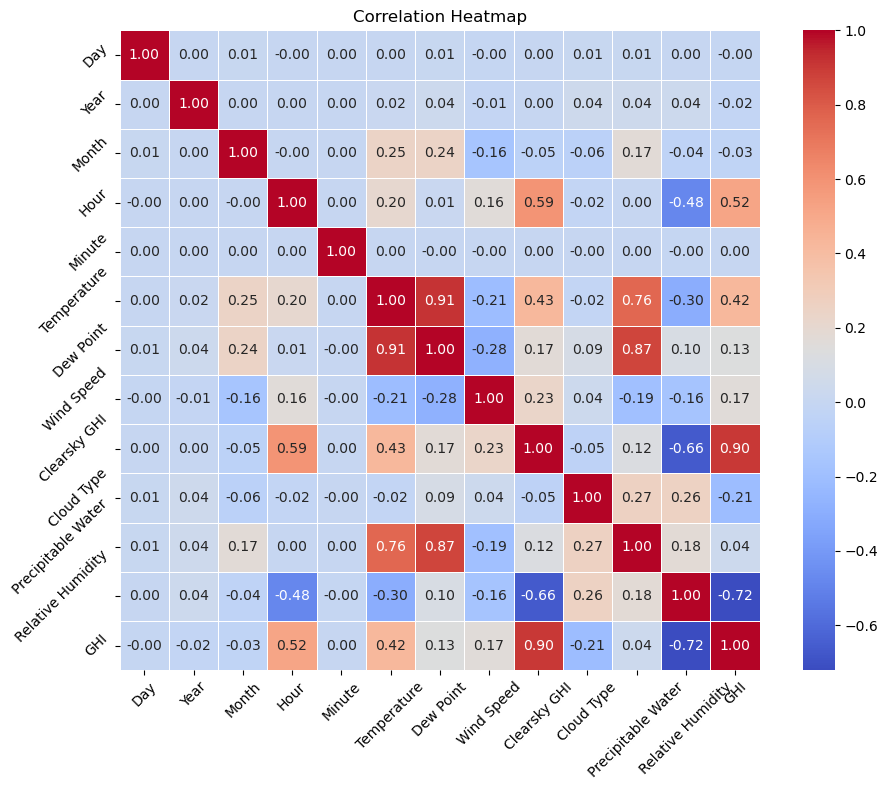

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the heatmap
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)

# Add titles and labels
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()  # Adjust the layout to make room for labels

# Show the heatmap
plt.show()


C:\Users\tatak\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


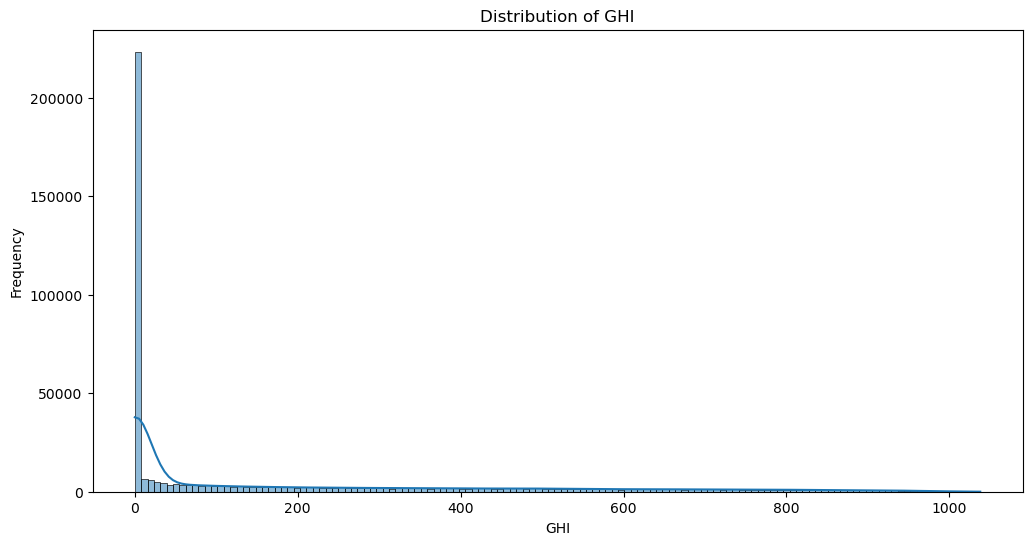

In [11]:
plt.figure(figsize=(12, 6))
sns.histplot(data['GHI'], kde=True)
plt.title('Distribution of GHI')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.show()


In [12]:
import pandas as pd
monthly_ghi_df = data.groupby(data['Month'])['GHI'].mean().reset_index()
monthly_ghi_df

,Month,GHI
0,1,87.691962
1,2,123.799851
2,3,169.067608
3,4,213.449472
4,5,237.829167
5,6,265.559417
6,7,265.561263
7,8,234.008414
8,9,189.769639
9,10,138.441613


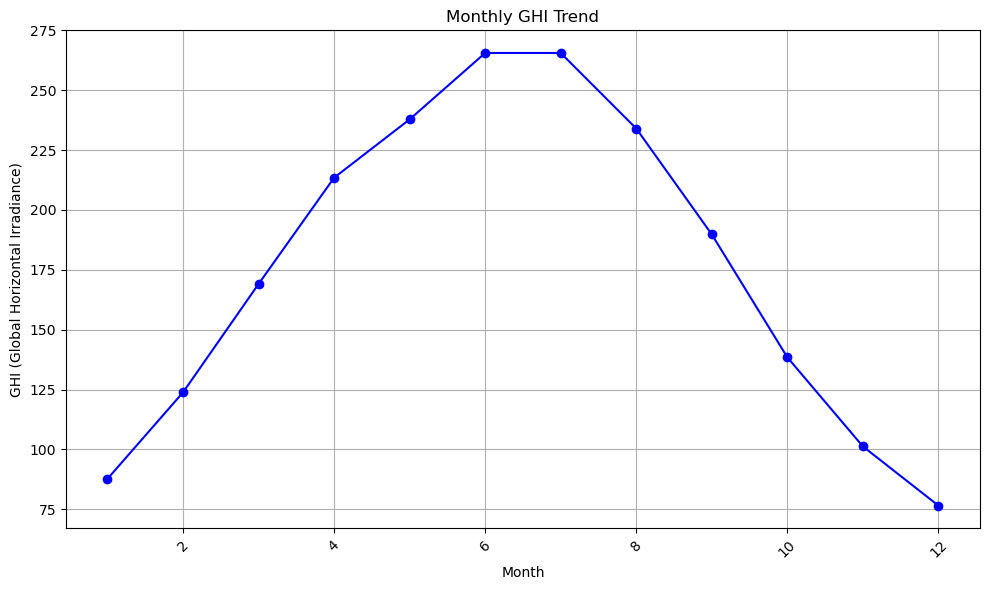

In [13]:
import pandas as pd
import matplotlib.pyplot as plt



# Avg. GHI Generated per year
plt.figure(figsize=(10, 6))
plt.plot(monthly_ghi_df.Month, monthly_ghi_df.GHI, marker='o', linestyle='-', color='b')
plt.title('Monthly GHI Trend')
plt.xlabel('Month')
plt.ylabel('GHI (Global Horizontal Irradiance)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd



# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Created a new column 'Season' by applying the mapping function
data['Season'] = data['Month'].apply(get_season)

# Group by 'Season' and sum the GHI values
seasonal_ghi_df = data.groupby('Season')['GHI'].mean().reset_index()

# Display the result
print(seasonal_ghi_df)


   Season         GHI
0    Fall  143.098306
1  Spring  206.709611
2  Summer  254.928723
3  Winter   95.075824


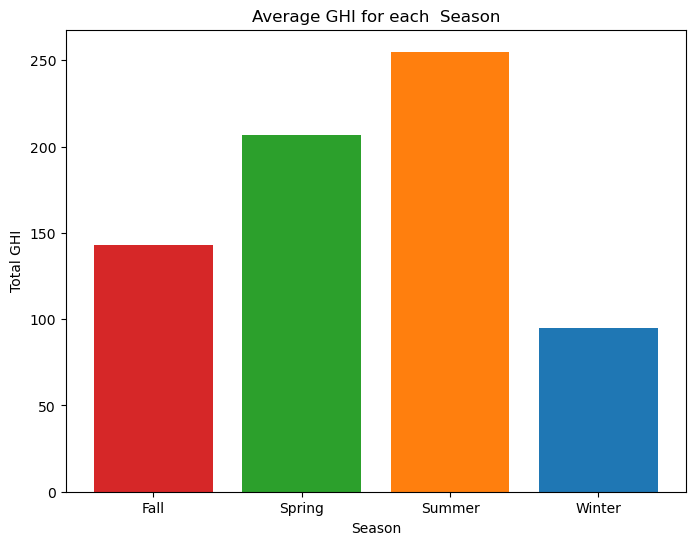

In [15]:
import matplotlib.pyplot as plt

# Define colors for each season
season_colors = {
    'Winter': '#1f77b4',  # blue
    'Spring': '#2ca02c',  # green
    'Summer': '#ff7f0e',  # orange
    'Fall': '#d62728'     # red
}

# Total GHI per season
plt.figure(figsize=(8, 6))
plt.bar(seasonal_ghi_df['Season'], seasonal_ghi_df['GHI'], 
        color=[season_colors[season] for season in seasonal_ghi_df['Season']])
plt.xlabel('Season')
plt.ylabel('Total GHI')
plt.title('Average GHI for each  Season')
plt.show()


In [16]:
hourly_ghi_df = data.groupby(data['Hour'])['GHI'].mean().reset_index()
hourly_ghi_df

,Hour,GHI
0,0,3.543178
1,1,0.000000
2,2,0.000000
3,3,0.000000
4,4,0.000000
5,5,0.000000
6,6,0.000000
7,7,0.000000
8,8,0.000000
9,9,0.000000


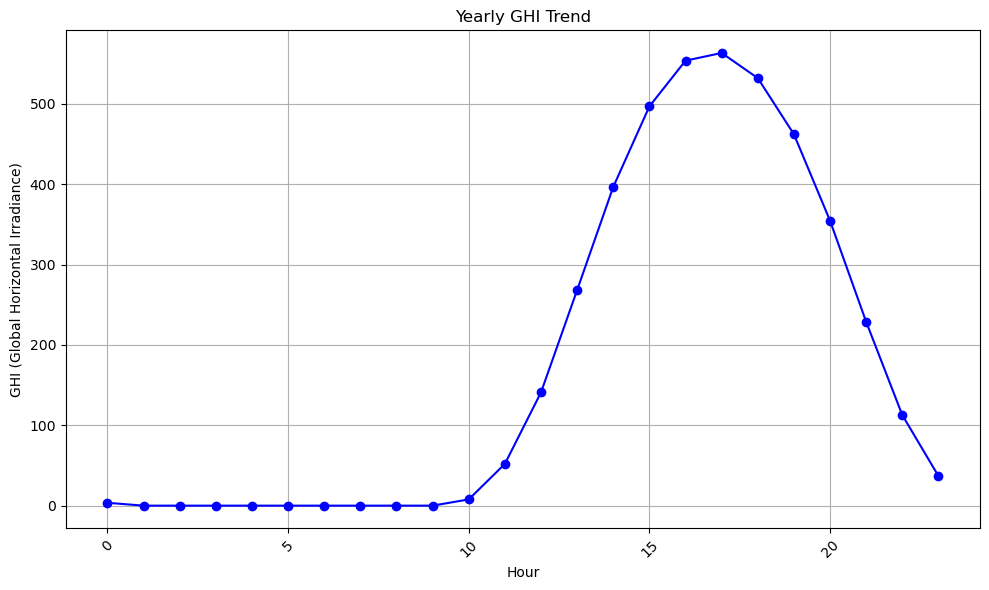

In [17]:


# Avg. GHI Generated per hour
plt.figure(figsize=(10, 6))
plt.plot(hourly_ghi_df.Hour, hourly_ghi_df.GHI, marker='o', linestyle='-', color='b')
plt.title('Yearly GHI Trend')
plt.xlabel('Hour')
plt.ylabel('GHI (Global Horizontal Irradiance)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [18]:
temp_ghi_df = data.groupby(data['Temperature'])['GHI'].mean().reset_index()
temp_ghi_df

,Temperature,GHI
0,-18.0,0.0
1,-17.8,0.0
2,-17.7,0.0
3,-17.6,0.0
4,-17.5,0.0
...,...,...
572,39.7,642.0
573,39.8,819.0
574,39.9,716.0
575,40.0,767.5


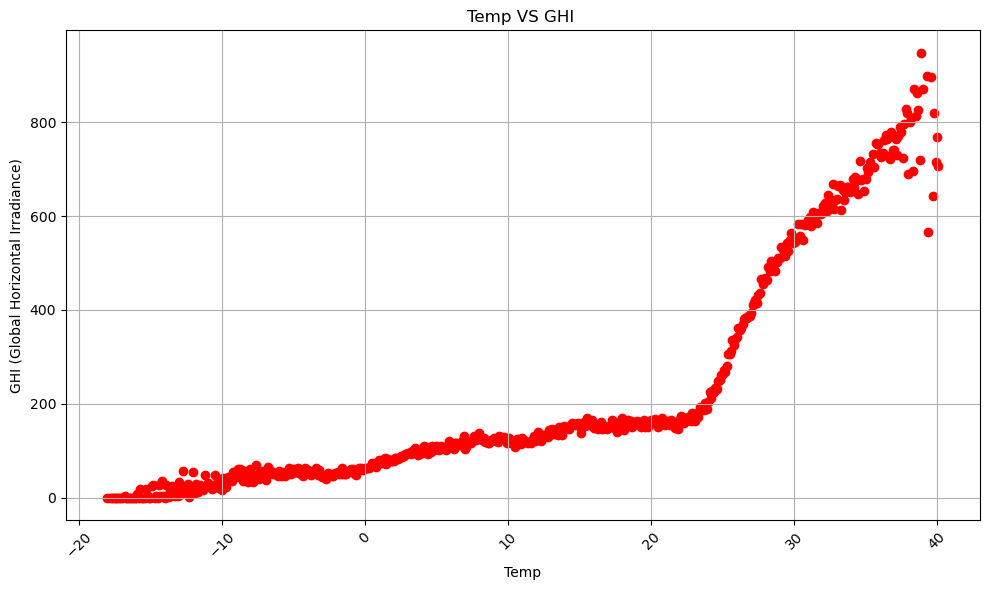

In [20]:
 #Avg. GHI Generated per hour
plt.figure(figsize=(10, 6))
plt.scatter(temp_ghi_df.Temperature, temp_ghi_df.GHI, marker='o', color='r')
plt.title('Temp VS GHI ')
plt.xlabel('Temp')
plt.ylabel('GHI (Global Horizontal Irradiance)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()